<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [197]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.preprocessing import StandardScaler

### 1. Import the data

In [29]:
csv = pd.read_csv('ais.csv', index_col = 'Unnamed: 0')

### 2. Do some EDA of relationships between features.

In [15]:
csv.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [16]:
csv.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

In [17]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 22.1+ KB


In [18]:
csv[['bmi', 'ssf']]

,bmi,ssf
1,20.56,109.1
2,20.67,102.8
3,21.86,104.6
4,21.88,126.4
5,18.96,80.3
...,...,...
198,27.56,67.2
199,23.76,56.5
200,22.01,47.6
201,22.34,60.4


Text(0.5, 1.0, 'BMI Vs SSF by Gender')

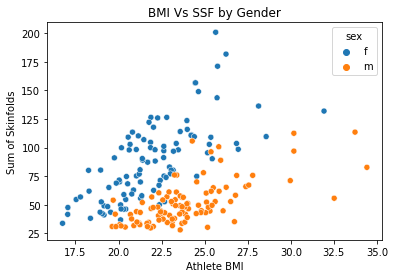

In [19]:
sns.scatterplot(x='bmi', y='ssf', data=csv, hue='sex')
plt.xlabel('Athlete BMI')
plt.ylabel('Sum of Skinfolds')
plt.title('BMI Vs SSF by Gender')

In [20]:
csv.sport.value_counts()

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

(array([ 8., 28., 23., 38., 44., 41., 13.,  3.,  2.,  2.]),
 array([11.6 , 12.36, 13.12, 13.88, 14.64, 15.4 , 16.16, 16.92, 17.68,
        18.44, 19.2 ]),
 <BarContainer object of 10 artists>)

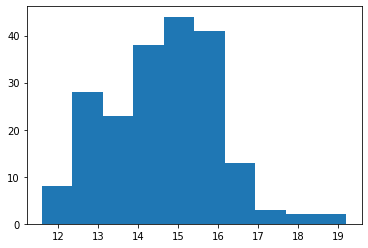

In [21]:
plt.hist(x='hg', data=csv)

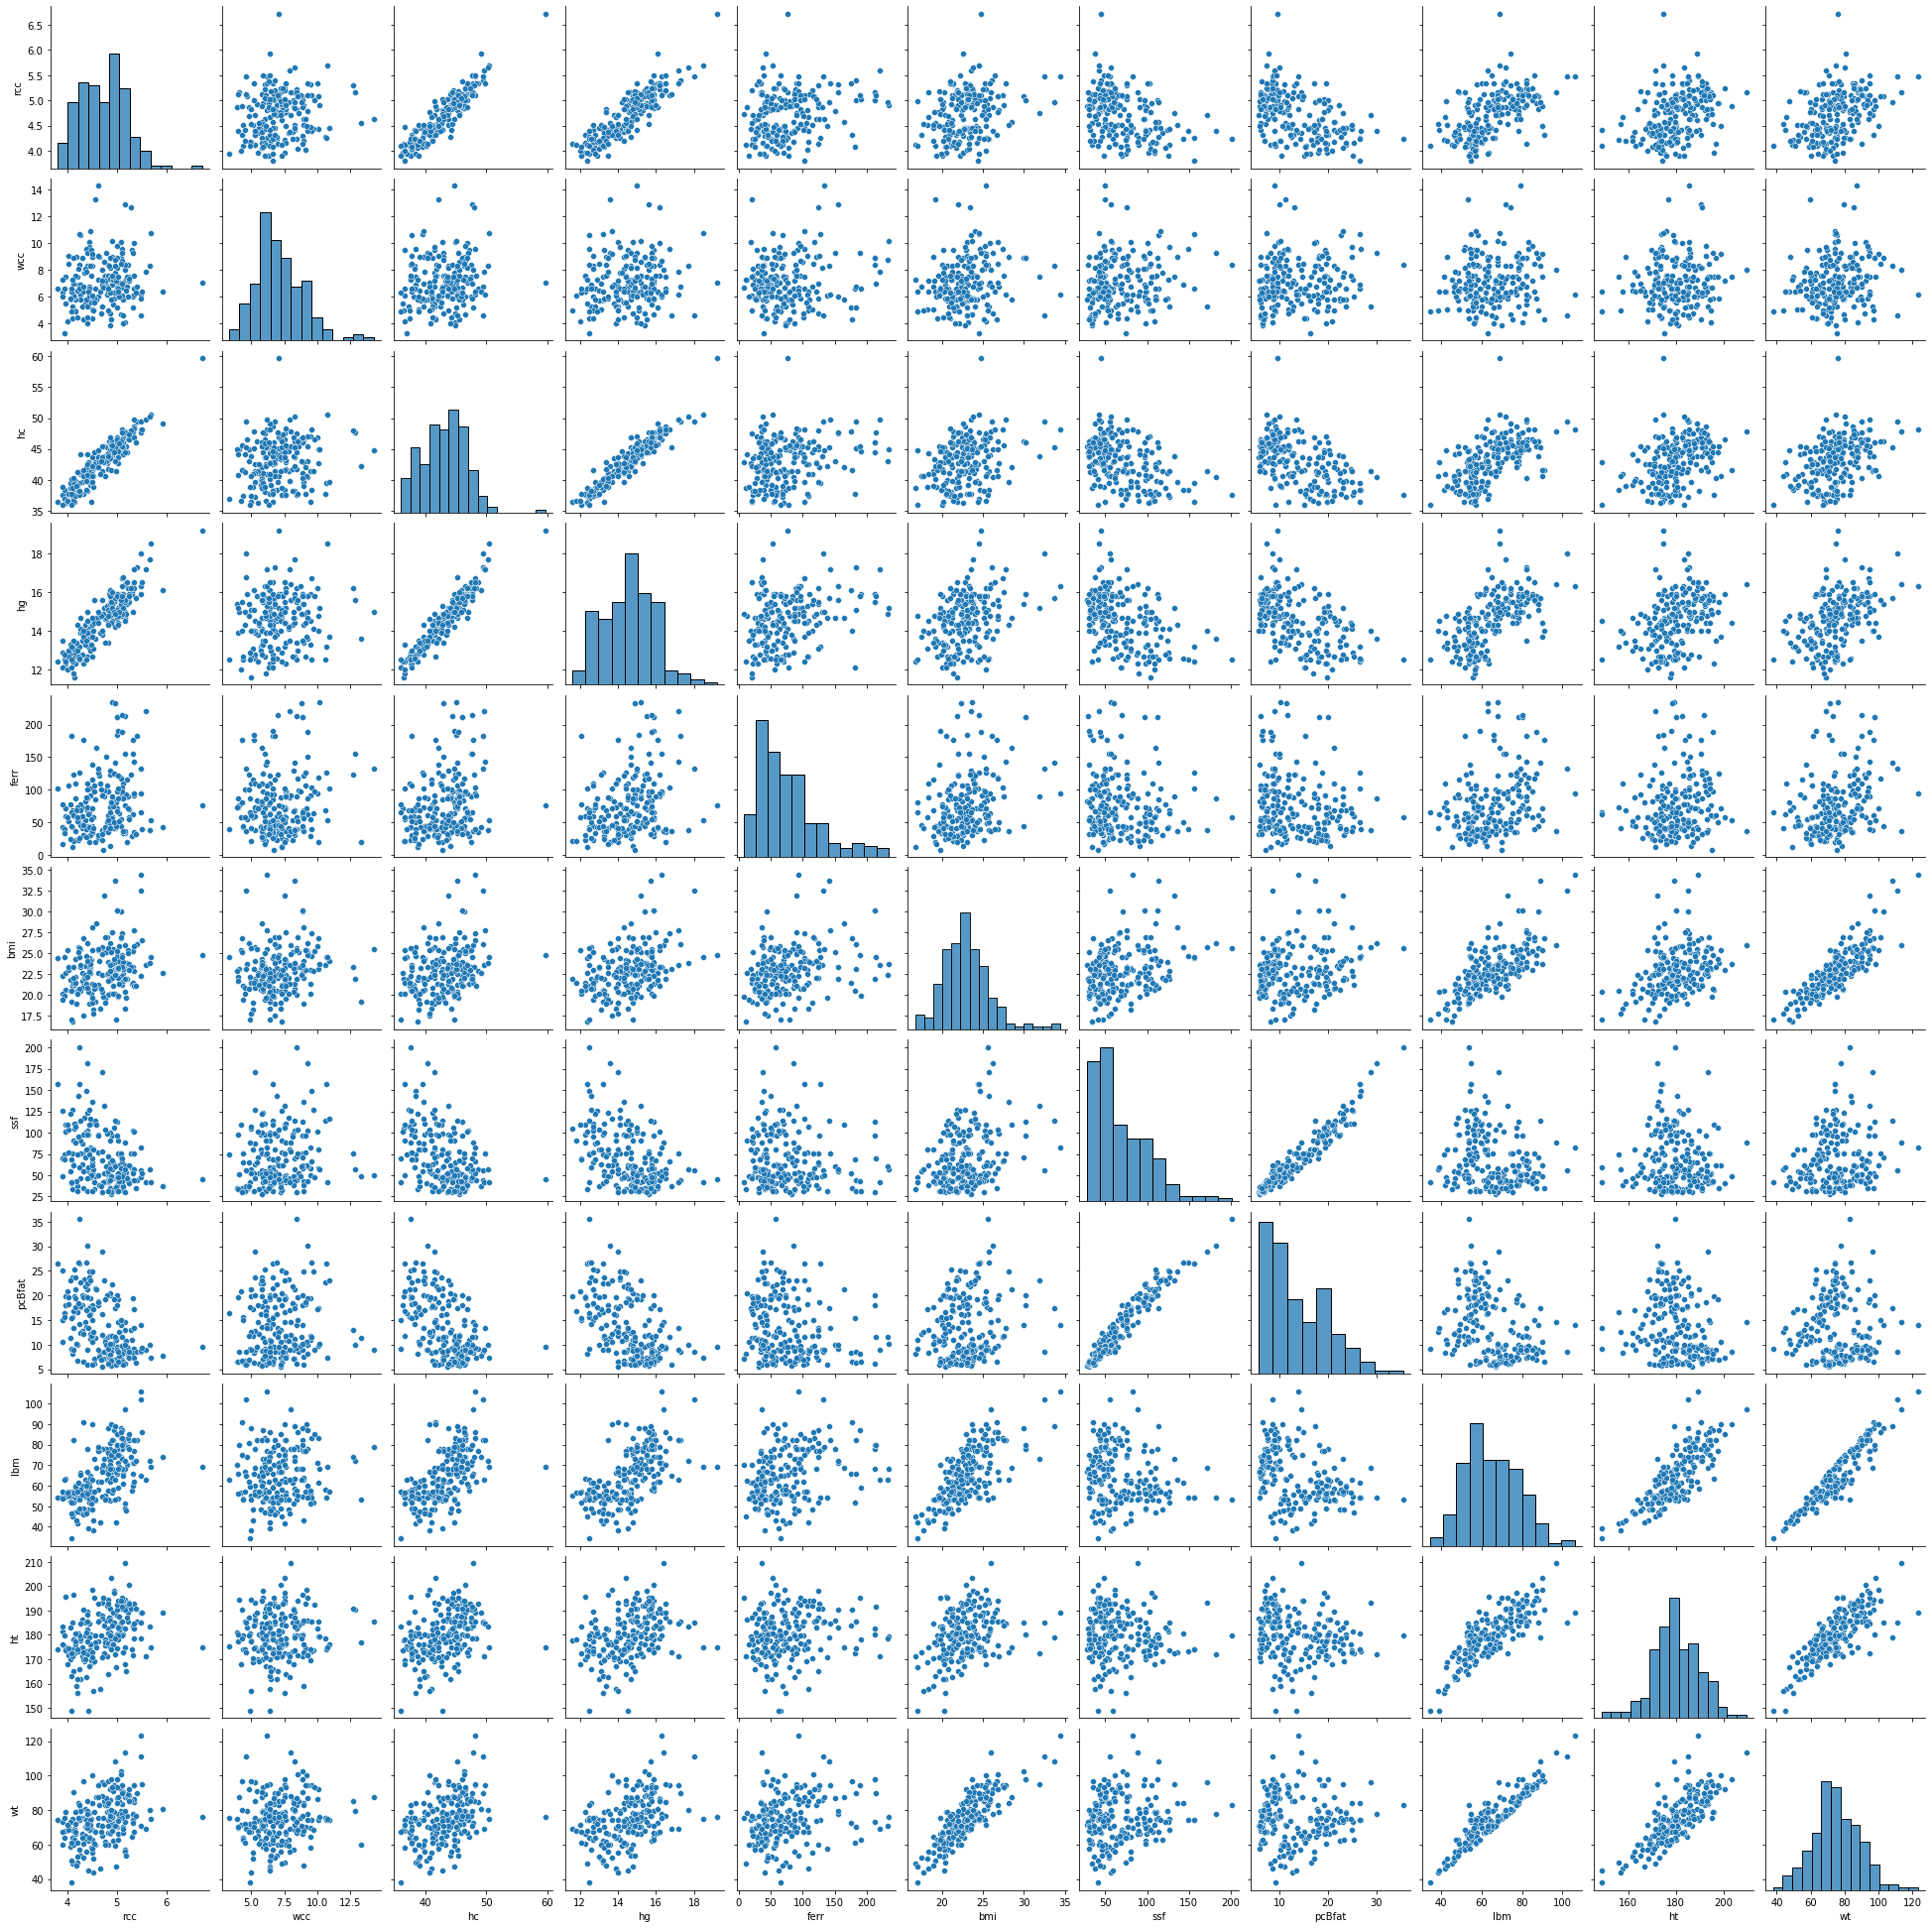

In [22]:
sns.pairplot(csv)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [30]:
# ANSWER
csv1 = csv.drop(['sex', 'sport'], axis=1)

In [31]:
csv.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [32]:
csv1.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [34]:
X = csv1

In [35]:
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 202 rows and 11 columns
Basic Statistics about X__________________________________________________
              rcc         wcc          hc          hg        ferr         bmi  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean     4.718614    7.108911   43.091584   14.566337   76.876238   22.955891   
std      0.457976    1.800337    3.662989    1.362451   47.501239    2.863933   
min      3.800000    3.300000   35.900000   11.600000    8.000000   16.750000   
25%      4.372500    5.900000   40.600000   13.500000   41.250000   21.082500   
50%      4.755000    6.850000   43.500000   14.700000   65.500000   22.720000   
75%      5.030000    8.275000   45.575000   15.575000   97.000000   24.465000   
max      6.720000   14.300000   59.700000   19.200000  234.000000   34.420000   

              ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.000000  202.00000

In [37]:
scaler = StandardScaler()

In [58]:
X_scaled = scaler.fit_transform(X)

In [59]:
X_scaled

array([[-1.66056304,  0.21777075, -1.53030101, ..., -0.11916982,
         1.62671873,  0.2801934 ],
       [-0.67553837,  0.66323597, -1.33872548, ..., -0.48502895,
         0.98822602, -0.04376463],
       [-1.26655317, -1.17430808, -1.83134828, ..., -0.72970203,
        -0.23726805, -0.42531519],
       ...,
       [ 0.68160673, -0.39474394, -0.10716849, ...,  0.23978631,
         0.30854023, -0.08695903],
       [ 0.55027011,  0.94165174, -0.02506469, ..., -0.14371383,
        -0.17547843, -0.28133385],
       [ 1.44773703, -0.45042709,  0.7959733 , ...,  0.54658641,
         1.10150699,  0.12181392]])

In [62]:
print(scaler.mean_)

[  4.71861386   7.10891089  43.09158416  14.56633663  76.87623762
  22.95589109  69.02178218  13.50742574  64.87371287 180.1039604
  75.00792079]


In [63]:
print(np.mean(X))

rcc         4.718614
wcc         7.108911
hc         43.091584
hg         14.566337
ferr       76.876238
bmi        22.955891
ssf        69.021782
pcBfat     13.507426
lbm        64.873713
ht        180.103960
wt         75.007921
dtype: float64


### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [65]:
kmeans = KMeans(n_clusters=2)

In [66]:
kmeans

KMeans(n_clusters=2, random_state=0)

In [97]:
Xkl = kmeans.fit_predict(X_scaled)

In [98]:
Xkl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [99]:
Xk = kmeans.fit_transform(X_scaled)

In [100]:
Xk

array([[5.12358816, 3.07858279],
       [4.55970136, 2.26757466],
       [5.74032802, 2.43723413],
       [5.37275826, 2.59001712],
       [4.09083719, 1.63179048],
       [5.21127663, 1.99167846],
       [4.15826141, 1.87214881],
       [5.00984768, 1.38265462],
       [4.16002156, 1.3152266 ],
       [4.45483297, 2.02418901],
       [5.54244126, 4.87466689],
       [2.93170568, 2.31225653],
       [5.04396855, 1.84671565],
       [3.43644851, 2.01501729],
       [3.38040407, 1.73540879],
       [4.30997708, 1.24277905],
       [5.56859046, 2.45445124],
       [3.27877621, 1.74646459],
       [3.44466813, 2.15541488],
       [3.30231279, 2.02087548],
       [3.76326957, 1.4444692 ],
       [5.19561896, 2.91794147],
       [3.61589153, 1.89757824],
       [3.42526267, 2.53180787],
       [3.075229  , 1.99415708],
       [2.6821409 , 1.99606606],
       [4.62931064, 2.16108909],
       [4.00155751, 2.01676304],
       [5.98038029, 2.65874426],
       [3.94852994, 1.76276064],
       [3.

<AxesSubplot:>

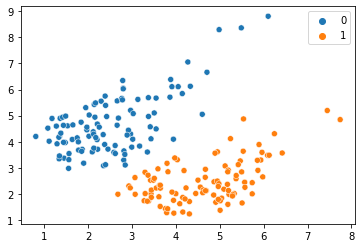

In [101]:
sns.scatterplot(x = Xk[:, 0], y= Xk[:, 1], hue = Xkl)

In [167]:
kmeans_4 = KMeans(n_clusters=4)

In [168]:
kmeans_4

KMeans(n_clusters=4)

In [169]:
label = kmeans_4.fit_predict(X_scaled)

In [170]:
label

array([3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 1, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 1])

In [171]:
Xk4 = kmeans_4.fit_transform(X_scaled)

In [172]:
Xk4

array([[5.24841659, 4.29381551, 2.56556044, 5.36139626],
       [4.81688487, 3.54681601, 1.81374535, 4.72584105],
       [6.19118115, 3.45544213, 2.33047352, 5.64890352],
       [5.60698657, 4.00344088, 1.85701199, 5.52174084],
       [4.89106651, 2.1754487 , 2.24122884, 3.69485516],
       [5.90569099, 2.3395273 , 2.62930085, 4.87408873],
       [4.56816263, 3.07192955, 1.6682819 , 4.2071328 ],
       [5.68277245, 2.35540974, 1.74674894, 4.73238197],
       [4.74400177, 2.10362839, 1.85599977, 4.03808134],
       [5.34398068, 2.0113206 , 2.853772  , 3.91583487],
       [5.24162343, 6.40274059, 3.72457444, 6.15018871],
       [3.57303819, 3.11499004, 2.38142764, 2.86619908],
       [5.59200513, 2.92588951, 1.79720354, 4.91387525],
       [3.6843448 , 3.29137861, 1.56221502, 3.73472021],
       [4.06755793, 2.71666258, 1.80867353, 3.23033032],
       [4.86198236, 2.62100245, 1.14495646, 4.20792669],
       [5.78323098, 3.94459406, 1.61993824, 5.73058111],
       [4.03657136, 2.32140315,

<AxesSubplot:>

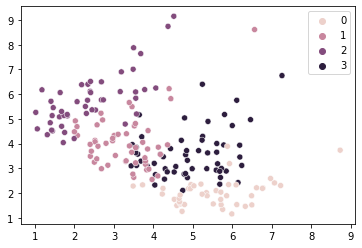

In [204]:
sns.scatterplot(x = Xk4[:, 0], y= Xk4[:, 1], hue = label)

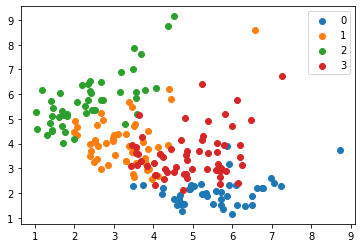

In [174]:
#Getting unique labels

u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(Xk4[label == i , 0] , Xk4[label == i , 1] , label = i)
plt.legend()
plt.show()

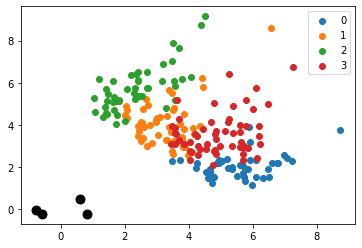

In [175]:
centroids = kmeans_4.cluster_centers_
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(Xk4[label == i , 0] , Xk4[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [137]:
centroids

array([[-0.8570217 , -0.04849597, -0.91576651, -0.88360258, -0.39338309,
         0.10664052,  1.22374084,  1.30408091, -0.53993222, -0.19307911,
        -0.0840794 ],
       [-0.54991204, -0.21074743, -0.51471271, -0.59105878, -0.38001976,
        -1.02173718, -0.40306825, -0.16256092, -1.08378937, -1.04456283,
        -1.2183081 ],
       [ 0.83359376, -0.19197321,  0.80991546,  0.79804782,  0.0643323 ,
        -0.18837463, -0.79849352, -0.91008594,  0.29974257,  0.24947091,
        -0.02284658],
       [ 0.58857662,  0.469505  ,  0.6483005 ,  0.69771482,  0.74390348,
         1.06496953, -0.13425937, -0.33358526,  1.32633806,  0.9468184 ,
         1.28911268]])

In [206]:
kmeans_1 = KMeans(n_clusters=4).fit(X_scaled)
centroids = kmeans_1.cluster_centers_
print(centroids)

[[-0.57679269 -0.20665862 -0.53654095 -0.61455444 -0.37492209 -1.01958284
  -0.42706028 -0.18666119 -1.08874338 -1.07508949 -1.23161072]
 [ 0.58857662  0.469505    0.6483005   0.69771482  0.74390348  1.06496953
  -0.13425937 -0.33358526  1.32633806  0.9468184   1.28911268]
 [-0.8570217  -0.04849597 -0.91576651 -0.88360258 -0.39338309  0.10664052
   1.22374084  1.30408091 -0.53993222 -0.19307911 -0.0840794 ]
 [ 0.83037383 -0.19572822  0.80357551  0.79190334  0.0518555  -0.20560255
  -0.77117748 -0.87615933  0.27824995  0.25094621 -0.03389924]]


### 5. Get the labels for the models

In [207]:
# ANSWER - Labels for Cluster = 2
Xkl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [208]:
#Labels for Cluster = 4
label

array([3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 1, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 1])

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


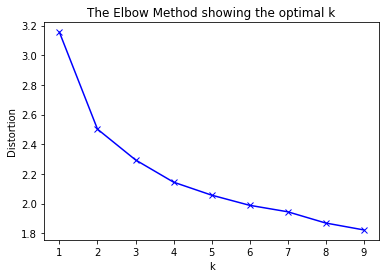

In [198]:
# ANSWER
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

In [ ]:
# ANSWER

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

Text(0.5, 1.0, 'Athlete Height Vs Weight by Gender')

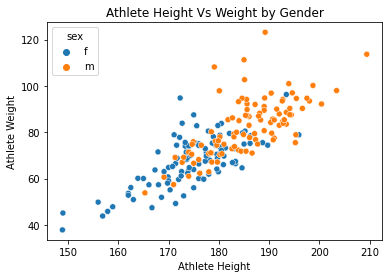

In [183]:
# ANSWER - Actual data
sns.scatterplot(x='ht', y='wt', data=csv, hue='sex', palette=["C0", "C1"])
plt.xlabel('Athlete Height')
plt.ylabel('Athlete Weight')
plt.title('Athlete Height Vs Weight by Gender')

In [178]:
csv['Xkl'] = Xkl

In [180]:
csv.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport,Xkl
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball,1
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball,1
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball,1
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball,1
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball,1


Text(0.5, 1.0, 'Athlete Height Vs Weight by Gender - Kmeans')

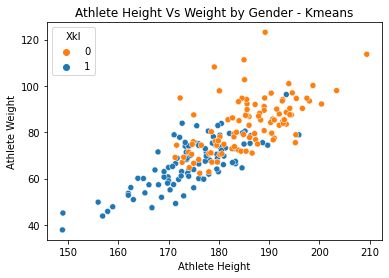

In [185]:
sns.scatterplot(x='ht', y='wt', data=csv, hue='Xkl', palette=["C1", "C0"])
plt.xlabel('Athlete Height')
plt.ylabel('Athlete Weight')
plt.title('Athlete Height Vs Weight by Gender - Kmeans')



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



